In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import torch
from torch.utils.data import DataLoader, TensorDataset
from transformers import AlbertTokenizer, AlbertModel
import pandas as pd
from tqdm import tqdm


# Severity Model Confusion Matrix

In [64]:
df = pd.read_json('test_severity_df.json')
df['predict_value'] = df['predict'].apply(lambda x: ['warning','error','alert','critical','emergency'][x])

In [65]:
pd.crosstab(df['severity'],df['predict_value'],margins=True)

predict_value,alert,critical,emergency,error,All
severity,,,,,
alert,424,21,33,19,497
critical,50,715,62,158,985
emergency,27,18,89,7,141
error,22,293,25,515,855
warning,0,5,0,0,5
All,523,1052,209,699,2483


<Axes: xlabel='predict_value', ylabel='severity'>

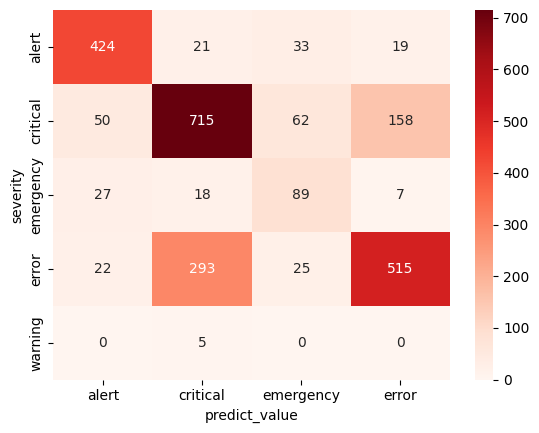

In [66]:
sns.heatmap(pd.crosstab(df['severity'],df['predict_value']),annot=True, cmap='Reds',fmt='g')

the question data for warning label is not enoug

# Stack Group Model Confusion Matrix

In [67]:
df = pd.read_json('test_stack_group_df.json')
df['predict_value'] = df['predict'].apply(lambda x: ["backend","database","frontend","devops","mobile"][x])

In [68]:
pd.crosstab(df['stack_group'],df['predict_value'],margins=True)

predict_value,backend,database,devops,All
stack_group,,,,
backend,393,62,48,503
database,107,961,35,1103
devops,68,33,700,801
frontend,21,4,9,34
mobile,22,6,14,42
All,611,1066,806,2483


<Axes: xlabel='predict_value', ylabel='stack_group'>

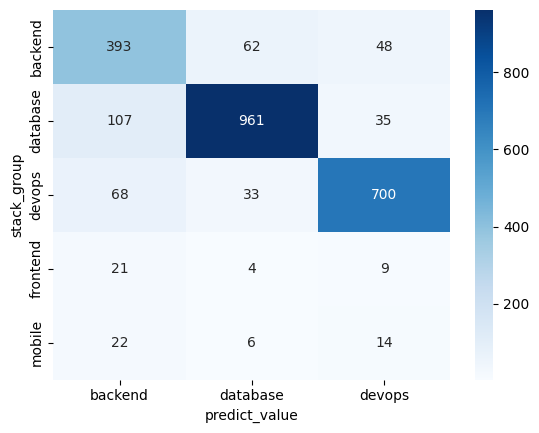

In [69]:
sns.heatmap(pd.crosstab(df['stack_group'],df['predict_value']),annot=True, cmap='Blues',fmt='g')

In [73]:
df.stack_group.unique()

array(['backend', 'database', 'frontend', 'devops', 'mobile'],
      dtype=object)

the question data for frontend and mobile labels is not enough